In [11]:
import numpy as np
import matplotlib.pyplot as plt
#from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm#, rdpg
from graspy.utils import symmetrize

warnings.filterwarnings("ignore")
FONTSIZE = 30

In [46]:
def double_plot(A, B):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.heatmap(B, ax=ax[1], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    ax[0].set_title('Adjacency matrix A', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency matrix B',fontsize=FONTSIZE)
    return ax

In [93]:
def rho_sbm(rho,k,L,n=100):
    L = symmetrize(L)
    A = binary_sbm([int(n/k)]*k, L)
    B = np.copy(A)
    c1,c2 = -1,-1
    for i,row in enumerate(A):
        if i%int(n/k)==0:
            c1+=1
            c1 = c1%4
        for j,elem in enumerate(row):
            if j%int(n/k)==0:
                c2+=1
                c2 = c2%4
            B[i,j] = np.random.binomial(1,rho*elem + (1-rho)*L[c1,c2])
    np.fill_diagonal(B,0)
    return A,B

In [94]:
n = 100
k = 4
#b = lambda x:x%int(n/k)
L = np.array([
    [0.9, 0.11, 0.13, 0.2],
    [0, 0.7, 0.1, 0.1], 
    [0, 0, 0.8, 0.1],
    [0, 0, 0, 0.85]
])

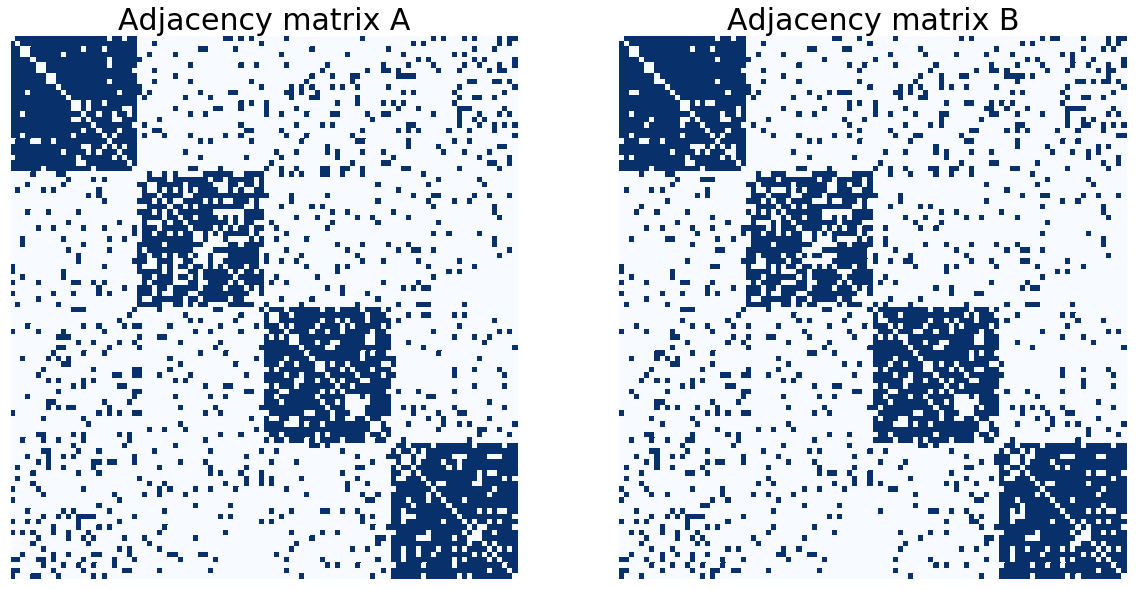

In [113]:
A,B = rho_sbm(0.9,k,L,n)
double_plot(A,B)
plt.show()

In [103]:
from tqdm import tqdm

In [111]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,10)):
    diffs = []
    for _ in range(0,5000):
        A,B = rho_sbm(0.1,k,L,n)
        diffs.append(np.linalg.norm(A-B))
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))


100%|██████████| 10/10 [30:35<00:00, 179.06s/it]


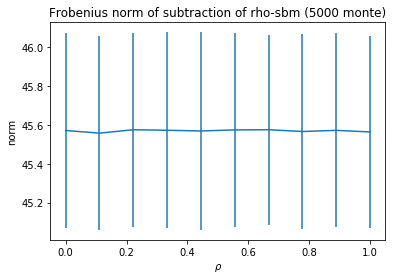

In [112]:
plt.errorbar(np.linspace(0,1,10),y,yerr=yerr)
plt.title('Frobenius norm of subtraction of rho-sbm (5000 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()